In [1]:
from env.res_env_evil import ResistanceEvilEnv
from env.res_env_good import ResistanceGoodEnv

import numpy as np
import os
import numpy as np
from runner.runner_res_evil_trainer import RunnerMA_Evil
from runner.runner_res_good_trainer import RunnerMA_Good



### Restore Trained Evil policy

In [17]:
# Example configuration
class Args:
    def __init__(self):
        self.env_name = 'Resistance Evil Env'
        self.algorithm_name = 'MAPPO'
        self.experiment_name = 'Res Experience'
        self.use_centralized_V = True
        self.num_env_steps = 7
        self.episode_length = 7
        self.n_rollout_threads = 1
        self.use_linear_lr_decay = False
        self.hidden_size = 64
        self.gamma = .99
        self.gae_lambda = .95
        self._use_gae = True
        self.actor_lr = 7e-4
        self.critic_lr = 1e-3
        self.opti_eps=1e-5
        self.weight_decay=0
        self.gamma=0.99
        self.clip_param=0.2
        self.value_loss_coef=1
        self.entropy_coef=0.01
        self.ppo_epoch=10
        self.num_mini_batch=1
        self.huber_delta=10.0
        self.use_huber_loss=True
        self.use_clipped_value_loss=True
        self.gain = 0.01
        self.use_orthogonal = True
        self.use_feature_normalization = True
        self.use_ReLU = True
        self.layer_N = 1
        self.log_interval = 10000  # log every x steps
        
env = ResistanceEvilEnv()

config = {
    'all_args': Args(),
    'env': env,
    'device': 'cpu',
    'num_agents': 1,
    'good_policy': None,
}
runner_evil = RunnerMA_Evil(config)
runner_evil.restore('save_dir')
evil_policy = runner_evil.trainer.policy
evil_policy

### Set Up Good Trainer

In [18]:
# Example configuration
class Args:
    def __init__(self):
        self.env_name = 'Resistance Evil Env'
        self.algorithm_name = 'MAPPO'
        self.experiment_name = 'Res Experience'
        self.use_centralized_V = True
        self.num_env_steps = 700000
        self.episode_length = 1000
        self.n_rollout_threads = 1
        self.use_linear_lr_decay = False
        self.hidden_size = 64
        self.gamma = .99
        self.gae_lambda = .95
        self._use_gae = True
        self.actor_lr = 7e-4
        self.critic_lr = 1e-3
        self.opti_eps=1e-5
        self.weight_decay=0
        self.gamma=0.99
        self.clip_param=0.2
        self.value_loss_coef=1
        self.entropy_coef=0.01
        self.ppo_epoch=10
        self.num_mini_batch=1
        self.huber_delta=10.0
        self.use_huber_loss=True
        self.use_clipped_value_loss=True
        self.gain = 0.01
        self.use_orthogonal = True
        self.use_feature_normalization = True
        self.use_ReLU = True
        self.layer_N = 1
        self.log_interval = 100000  # log every x steps
        
env = ResistanceGoodEnv()

config = {
    'all_args': Args(),
    'env': env,
    'device': 'cpu',
    'num_agents': 3,
    'evil_policy': evil_policy
}
runner_good = RunnerMA_Good(config)
runner_good.restore('save_dir')

In [13]:
#runner_good.warmup()

 14%|█▍        | 100/700 [01:44<10:32,  1.05s/it]


99 / 700 episodes, total number of timesteps: 100000/700000, FPS 952. 
average episode rewards is -14.999999664723873 (av.reward: -0.014999999664723873 * ep_length 1000)


 29%|██▊       | 200/700 [03:29<08:43,  1.05s/it]


199 / 700 episodes, total number of timesteps: 200000/700000, FPS 952. 
average episode rewards is 79.00000363588333 (av.reward: 0.07900000363588333 * ep_length 1000)


 43%|████▎     | 300/700 [05:14<06:58,  1.05s/it]


299 / 700 episodes, total number of timesteps: 300000/700000, FPS 952. 
average episode rewards is 57.00000002980232 (av.reward: 0.05700000002980232 * ep_length 1000)


 57%|█████▋    | 400/700 [06:58<05:07,  1.03s/it]


399 / 700 episodes, total number of timesteps: 400000/700000, FPS 954. 
average episode rewards is 21.99999988079071 (av.reward: 0.02199999988079071 * ep_length 1000)


 71%|███████▏  | 500/700 [08:41<03:25,  1.03s/it]


499 / 700 episodes, total number of timesteps: 500000/700000, FPS 958. 
average episode rewards is 97.00000286102295 (av.reward: 0.09700000286102295 * ep_length 1000)


 86%|████████▌ | 600/700 [10:24<01:42,  1.02s/it]


599 / 700 episodes, total number of timesteps: 600000/700000, FPS 960. 
average episode rewards is 215.0000035762787 (av.reward: 0.2150000035762787 * ep_length 1000)


100%|██████████| 700/700 [12:07<00:00,  1.04s/it]


699 / 700 episodes, total number of timesteps: 700000/700000, FPS 962. 
average episode rewards is 96.00000083446503 (av.reward: 0.09600000083446503 * ep_length 1000)


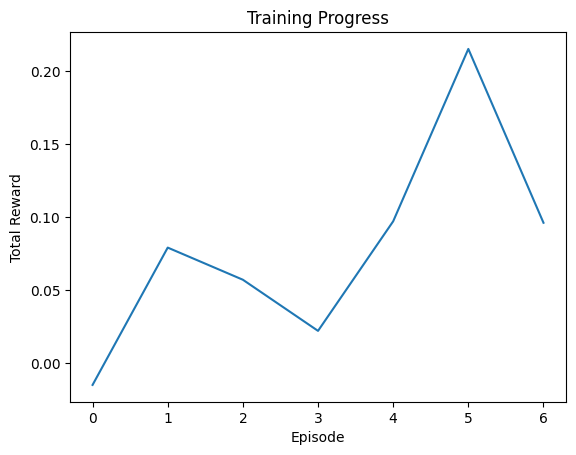

In [20]:
runner_good.run()

In [22]:
runner_good.save()

In [21]:
runner_good.eval(100, verbose=False)

Episode 1: Reward = 33, Number of steps: 28
=======  EPISODE END  ================

Episode 2: Reward = 30, Number of steps: 33
=======  EPISODE END  ================

Episode 3: Reward = 36, Number of steps: 17
=======  EPISODE END  ================

Episode 4: Reward = 30, Number of steps: 27
=======  EPISODE END  ================

Episode 5: Reward = 30, Number of steps: 31
=======  EPISODE END  ================

Episode 6: Reward = 33, Number of steps: 28
=======  EPISODE END  ================

Episode 7: Reward = 33, Number of steps: 28
=======  EPISODE END  ================

Episode 8: Reward = 33, Number of steps: 30
=======  EPISODE END  ================

Episode 9: Reward = 33, Number of steps: 28
=======  EPISODE END  ================

Episode 10: Reward = 33, Number of steps: 36
=======  EPISODE END  ================

Episode 11: Reward = -30, Number of steps: 31
=======  EPISODE END  ================

Episode 12: Reward = 36, Number of steps: 17
=======  EPISODE END  ======